<a id='title'></a>

# Analyzing the 2020 American Presidential Election using Twitter
## Page 2: Analyzing Polling Data

<i> David Grinberg</i>
___________________

<a id='contents'></a>
## Table of Contents
1. [<b>Project Introduction and 2020 Background Info](./Final_Project_1.ipynb) <br>
1. [<b> Analyzing Polling Data](#title)<br>
    2.1  [Where the Data is Located / FiveThirtyEight](#fivethirtyeight)<br>
    2.2 [Packages used](#packageimports)<br>
    2.3 [Creating & Managing the DataFrame](#readcsv)<br>
    2.4 [2020 Election](#election)<br>
    2.5 [Data Cleanup](#cleanup)<br>
    2.6 [FiveThirtyEight's Data Grading](#ftegrade)<br>
    2.7 [Weighted Averaging](#weightedavg)<br>
    2.8 [Graphs](#graphs)<br>
    2.9 [Exporting the Data](#export)<br>
1. [<b>Twitter Sentiment Analysis](./Final_Project_3.ipynb)<br>
1. [<b>Comparing Polling Data with Sentiment Analysis Data](./Final_Project_4.ipynb)<br>
1. [<b>Project Conclusion](./Final_Project_5.ipynb)<br>





___________________

### Getting the Data
<a id='fivethirtyeight'></a>
FiveThirtyEight (sometimes referred to as 538) is a website that analyzes political opinion polls, sports statistics, and economics. During election cycles, they aggregate political polls conducted by numerous groups and weight them according to their proprietary methodology. We will be analyzing their presidential election polling data from September 1st to November 3rd, 2020. Their data set contains roughly eight-thousand polls during this period, and the polls themselves vary by demographics surveyed, survey methodology, and overall quality.

The data we will be using is included in the project folder, however, if you are interested in analyzing the data for yourself, [you can download their data directly](https://projects.fivethirtyeight.com/polls/data/president_polls_historical.csv "download link") or you can explore other political polls on their [website](https://projects.fivethirtyeight.com/polls "fivethirtyeight.com/polls")

<br>

___________________

<a id='packageimports'></a>
### Package Imports


- Pandas is used to import, edit, manipulate, and create .csv files
- Matplotlib.pyplot is used to create the graphs
- Matplotlib.patches is used to manually create legends for graphs.
- Numpy is used here to check for NaN values

[Table of Contents](#contents)
________________________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

<a id='readcsv'></a>
### Reading the data into a Pandas DataFrame

Here we create a pandas DataFrame object using the .csv file we downloaded from FiveThirtyEight earlier. Since the file is quite large, it is important to tell pandas what type of data is stored in each column. This greatly reduces the amount of memory used, speeding up the overall process and reducing the burden on the RAM.

Once created, we modify the DataFrame to remove unnecessary columns. This will also help greatly reduce the amount of memory needed by the program. The new DataFrame has 30 fewer columns than the original .csv file. 



[[Table of Contents]](#contents)


___________________

In [2]:
df=pd.read_csv('https://projects.fivethirtyeight.com/polls/data/president_polls_historical.csv',dtype={'poll_id':str, 'pollster_id':str, 'pollster':str, 
 'sponsor_ids':str, 'sponsors':str, 'display_name':str,
 'pollster_rating_id':str, 'pollster_rating_name':str, 'fte_grade':str,
 'methodology':str, 'state':str, 'start_date':str,
 'end_date':str, 'sponsor_candidate_id':str, 'sponsor_candidate':str,
 'sponsor_candidate_party':str, 'question_id':int, 'sample_size':str,
 'population':str, 'subpopulation':str, 'population_full':str,
 'tracking':str, 'created_at':str, 'notes':str,
 'url':str, 'source':str, 'internal':bool,
 'partisan':str, 'race_id':str, 'cycle':str,
 'office_type':str, 'seat_number':str, 'seat_name':str,
 'election_date':str, 'stage':str, 'nationwide_batch':bool,
 'ranked_choice_reallocated':bool, 'party':str, 'answer':str,
 'candidate_id':str, 'candidate_name':str, 'pct':float})
pd.set_option('display.max_columns', None)
len(df.columns)
df=df.iloc[:,[0, 1, 5, 8, 11, 12, -13,-12, -5, -4, -2,-1]]

df.head(2) # this shows us what the DataFrame roughly looks like)

,poll_id,pollster_id,display_name,fte_grade,start_date,end_date,office_type,seat_number,party,answer,candidate_name,pct
0,73830,940,Lake Research Partners,A/B,10/31/20,11/3/20,U.S. President,0,DEM,Biden,Joe Biden,51.0
1,73830,940,Lake Research Partners,A/B,10/31/20,11/3/20,U.S. President,0,REP,Trump,Donald Trump,48.0


<a id='cleanup'></a>
### Data Cleanup & Sorting


In order to make the data more useful, we turn the start and end dates into DateTime objects. This turns the date values from strings into actual usable dates. Afterward, all data outside the September 1st - November 3rd range can be filtered out. 
Also, since this project is only concerned with Donald Trump and Joe Biden, all 3rd party candidates (I.E. Libertarian - Jo Jorgensen) have also been filtered out from the DataFrame.

[[Table of Contents]](#contents)
________________________


In [3]:
df

,poll_id,pollster_id,display_name,fte_grade,start_date,end_date,office_type,seat_number,party,answer,candidate_name,pct
0,73830,940,Lake Research Partners,A/B,10/31/20,11/3/20,U.S. President,0,DEM,Biden,Joe Biden,51.0
1,73830,940,Lake Research Partners,A/B,10/31/20,11/3/20,U.S. President,0,REP,Trump,Donald Trump,48.0
2,74946,1677,The Political Matrix/The Listener Group,NaN,11/2/20,11/2/20,U.S. President,0,DEM,Biden,Joe Biden,44.2
3,74946,1677,The Political Matrix/The Listener Group,NaN,11/2/20,11/2/20,U.S. President,0,REP,Trump,Donald Trump,48.0
4,72621,383,Public Policy Polling,A-,11/1/20,11/2/20,U.S. President,0,DEM,Biden,Joe Biden,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,57026,383,Public Policy Polling,A-,11/27/18,11/28/18,U.S. President,0,REP,Trump,Donald Trump,46.0
16700,57026,383,Public Policy Polling,A-,11/27/18,11/28/18,U.S. President,0,DEM,Warren,Elizabeth Warren,43.0
16701,57026,383,Public Policy Polling,A-,11/27/18,11/28/18,U.S. President,0,REP,Trump,Donald Trump,49.0
16702,57025,399,Rasmussen Reports,B,11/12/18,11/13/18,U.S. President,0,DEM,Obama,Michelle Obama,50.0


In [4]:
#Change dates to Datetime objects
df['start_date']=pd.to_datetime(df['start_date'])
df['end_date']=pd.to_datetime(df['end_date'])

#remove data from outside the target dates 
df.set_index('end_date',inplace=True)
df.sort_index()
data=df.loc["2020-08-22":,:]
data.reset_index(inplace=True)
data.sort_values('end_date',inplace=True)
cols=['start_date','end_date','candidate_name', 'pct', 'poll_id','fte_grade','party', 'pollster_id', 'display_name', 'office_type',  'answer', ]
data=data[cols]

In [5]:
#removing 3rd party candidates
data=(data.set_index('party'))
data=data.sort_index()
data=data.loc[['REP','DEM']]
data.reset_index(inplace=True)
data=data[cols]
data.sort_values('end_date',inplace=True)
data=data.set_index('answer')
data.head(2)

,start_date,end_date,candidate_name,pct,poll_id,fte_grade,party,pollster_id,display_name,office_type
answer,,,,,,,,,,
Trump,2020-09-01,2020-09-01,Donald Trump,42.82,68475,B,REP,1515,Data for Progress,U.S. President
Biden,2020-08-28,2020-09-01,Joe Biden,43.00,68317,B-,DEM,241,Ipsos,U.S. President


<a id='ftegrade'></a>
### FiveThirtyEight's Data Grading 

FiveThirtyEight (FTE) assigns a letter grade to polls based on their methodology and sample size. The highest grade FTE assigns to a poll is an 'A+' score, and the lowest is an 'F'. Since FTE uses thirteen different grades in its ranking system, the easiest weighting method would be to rank the letters numerically and divide them by 13 to get a numerical weight between 0 and 1. 

| Letter Grade | Weight (fraction) | Weight (Decimal)  |
| --- | ---    | ---    |
| A+  | 13/13  |1.00    |
| A   | 12/13  | 0.923..|
| A-  | 11/13  |0.846.. |
| A/B | 10/13  |0.769.. |
| B+  | 9/13   |0.692.. |
| B   | 8/13   |0.615.. |
| B-  | 7/13   |0.538.. |
| B/C | 6/13   |0.461.. |
| C+  | 5/13   |0.384.. |
| C   | 4/13   |0.307.. |
| C-  | 3/13   |0.230.. |
| C/D | 2/13   |0.153.. |
| F   | 1/13   |0.076.. |
| NaN | 0/13   |0.00    |


While this method does allow us to assign numerical weights to the poll data, there are some points of concern:
- This method relies on the accuracy of the grading formula developed by FiveThirtyEight's Nate Silver
- This method assumes that the grading scale is a linear function, and not a logarithmic function.
- This weighting method is stepwise, which does not take into account the differences in quality within each letter grade. 


[Table of Contents](#contents)
________________________

In [6]:
weightedmean=pd.DataFrame()
weightedmean['Letter Grade']=['A+','A','A-','A/B','B+','B','B-','B/C','C+','C','C-','C/D','F','NaN']
weightedmean['Weight (Fraction)']=['13/13','12/13','11/13','10/13','9/13','8/13','7/13','6/13','5/13','4/13','3/13','2/13','1/13','0/13']
weightedmean['Letter (Decimal)']=[1.00,0.923,0.846,0.769,0.692,0.615,0.538,0.461,0.384,0.307,0.230,0.153,0.076,0.000]
weightedmean

,Letter Grade,Weight (Fraction),Letter (Decimal)
0,A+,13/13,1.000
1,A,12/13,0.923
2,A-,11/13,0.846
3,A/B,10/13,0.769
4,B+,9/13,0.692
5,B,8/13,0.615
6,B-,7/13,0.538
7,B/C,6/13,0.461
8,C+,5/13,0.384
9,C,4/13,0.307


In [7]:
from matplotlib.backends.backend_pdf import PdfPages

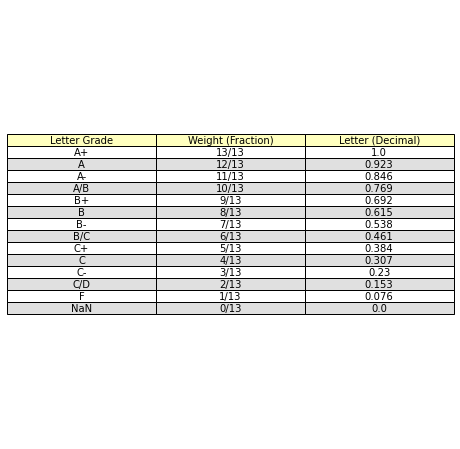

In [8]:
c=[['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],['w','w','w'],['#E0E0E0','#E0E0E0','#E0E0E0'],]

fig, ax =plt.subplots(figsize=(8,8))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=weightedmean.values,colLabels=weightedmean.columns,loc='center',cellLoc='center',colColours=['#ffffbf','#ffffbf','#ffffbf',],cellColours=c)

plt.savefig("Five_Thirty_Eight_Poll_Weight.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Five_Thirty_Eight_Poll_Weight.jpg",dpi=400,bbox_inches='tight')

plt.show()

In [9]:
FTE=data['fte_grade'].replace({"A+":13/13,"A":12/13,"A-":11/13, "A/B":10/13,
                              "B+":9/13,"B":8/13,"B-":7/13, "B/C":6/13,
                             "C+":5/13,"C":4/13,"C-":3/13, "C/D":2/13,"F":1/13,"nan":0})
data['FTE']=FTE.fillna(0)
del FTE

In [10]:
data['FTE']

answer
Trump    0.615385
Biden    0.538462
Trump    0.461538
Trump    0.615385
Trump    0.692308
           ...   
Biden    0.307692
Trump    0.846154
Biden    0.307692
Trump    0.769231
Biden    0.769231
Name: FTE, Length: 8082, dtype: float64

<a id='weightedavg'></a>
### Creating a Weighted Mean
In order to guarantee that the polls with lower quality data do not have a strong impact on the polling average, it is necessary to create a weighted average. To find the weighted average for a candidate on a given day:

1. A poll's percentage is multiplied by the numerical weight assigned to the poll. 
2. The sum of each day's (percent x weight) is calculated and divided by the sum of the dates

The formula is:


$$ 𝜇_{day} =\frac{Σ(poll percentage * weight)}{Σ(weight)}   $$

This gives us all of the data we need to begin creating graphs

[[Table of Contents]](#contents)

________________________

In [11]:
weight=data['FTE'].array
data['weight']=weight*13
data['weight']


answer
Trump     8.0
Biden     7.0
Trump     6.0
Trump     8.0
Trump     9.0
         ... 
Biden     4.0
Trump    11.0
Biden     4.0
Trump    10.0
Biden    10.0
Name: weight, Length: 8082, dtype: float64

In [12]:
pct=data['pct'].array
weighted_pct=weight*pct
weighted_pct
data['weighted_pct']=weighted_pct

In [13]:
#FTE2 is just the FTE weight divided by a number. This is useful as it al
data['FTE2']=data['FTE'].array/5
data['FTE2']

dates=np.array(list(set(data['end_date'])))
biden_weighted_df=data.loc['Biden']
biden_weighted_df.set_index('end_date',inplace=True)
trump_weighted_df=data.loc['Trump']
trump_weighted_df.set_index('end_date',inplace=True)

i=0
trump_weighted={}
biden_weighted={}
while i<len(dates):
    temp1=float((trump_weighted_df.loc[dates[i]]['weighted_pct']).sum())
    temp2=float((trump_weighted_df.loc[dates[i]]['FTE']).sum())
    temp3=temp1/temp2
    trump_weighted[dates[i]]=temp3  
    i=i+1

i=0    
while i<len(dates):
    temp1=float((biden_weighted_df.loc[dates[i]]['weighted_pct']).sum())
    temp2=float((biden_weighted_df.loc[dates[i]]['FTE']).sum())
    temp3=temp1/temp2
    biden_weighted[dates[i]]=temp3
    i=i+1

t_weighted_mean=pd.Series(trump_weighted)
t_weighted_mean.sort_index(inplace=True)
b_weighted_mean=pd.Series(biden_weighted,dtype=float)
b_weighted_mean.sort_index(inplace=True)

In [14]:
t_weighted_mean

2020-09-01    43.062324
2020-09-02    44.352838
2020-09-03    44.034848
2020-09-04    42.849348
2020-09-05    43.714167
                ...    
2020-10-30    45.332688
2020-10-31    46.740022
2020-11-01    45.848747
2020-11-02    46.511420
2020-11-03    48.000000
Length: 64, dtype: float64

In [15]:
# creating data sets for graphs 
trump=data.loc['Trump']
trump['pct'].astype(float)
trump['FTE2'].astype(float)
trump['pct'].mean()
trump_pct=trump['pct'].array
trump_poll=trump['end_date'].array
trump_alpha=trump['FTE2'].array
biden=data.loc['Biden']
biden['pct'].astype(float)
biden['pct'].mean()
biden['FTE2'].astype(float)
biden_pct=biden['pct'].array
biden_poll=biden['end_date'].array
biden_alpha=biden['FTE2'].array

In [16]:
biden_weighted_df

,start_date,candidate_name,pct,poll_id,fte_grade,party,pollster_id,display_name,office_type,FTE,weight,weighted_pct,FTE2
end_date,,,,,,,,,,,,,
2020-09-01,2020-08-28,Joe Biden,43.00,68317,B-,DEM,241,Ipsos,U.S. President,0.538462,7.0,23.153846,0.107692
2020-09-01,2020-08-28,Joe Biden,47.00,68317,B-,DEM,241,Ipsos,U.S. President,0.538462,7.0,25.307692,0.107692
2020-09-01,2020-08-29,Joe Biden,34.48,68502,B/C,DEM,1488,Spry Strategies,U.S. President,0.461538,6.0,15.913846,0.092308
2020-09-01,2020-08-28,Joe Biden,51.00,68336,C,DEM,1361,SSRS,U.S. President,0.307692,4.0,15.692308,0.061538
2020-09-01,2020-08-30,Joe Biden,52.09,70882,C,DEM,1193,SurveyMonkey,U.S. President,0.307692,4.0,16.027692,0.061538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02,2020-10-20,Joe Biden,61.00,72852,C,DEM,1193,SurveyMonkey,U.S. President,0.307692,4.0,18.769231,0.061538
2020-11-02,2020-10-20,Joe Biden,62.00,72856,C,DEM,1193,SurveyMonkey,U.S. President,0.307692,4.0,19.076923,0.061538
2020-11-02,2020-10-20,Joe Biden,53.00,72857,C,DEM,1193,SurveyMonkey,U.S. President,0.307692,4.0,16.307692,0.061538


<a id='graphs'></a>
### Graphs
1. [Polling Data Scatter Plots](#graph2)
1. [Comparing Weighted Polling Averages](#graph4)
1. [Combined Scatterplot and Weighted Average Line](#graph3)
1. [Daily Percent Change](#graph6)

<br />

[[Table of Contents]](#contents)
________________________

<a id='graph2'></a>
<b>Polling Data Scatter Plots </b>

These graphs show the results of each poll for the candidates on a day-to-day basis. The date is on the x-axis, and the polling percentage is on the y-axis. Each result is represented by a translucent circle with the opacity of the points being determined by the FiveThreeEighty grading of their poll. The numerical weights [previously calculated](#ftegrade) have been scaled down by 5 to create an alpha value between 0 and 0.2. The more opaque the color is in a location, the more high-quality values are located in that area.

$$ opacity\ _{point} = \frac {FTE\ weight} {5} $$

[List of Graphs](#graphs)
_____________________

In [17]:
xticks_1=["2020-09-01","2020-09-08","2020-09-15","2020-09-22",
          "2020-10-01","2020-10-08","2020-10-15","2020-10-22","2020-10-29","2020-11-03"]
yticks_1=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
yticks_2=[0,10,20,30,40,50,60,70,80,90,100]

In [18]:
xlabel_1="Date"
ylabel_1="Percent"
grid_alpha=.5

In [19]:
JBPoll = mpatches.Patch(color='blue', label='Joe Biden Polls')
DTPoll = mpatches.Patch(color='red', label='Donald Trump Polls')
DTWPoll = mpatches.Patch(color='green', label='Trump Weighted Polling average')
JBWPoll = mpatches.Patch(color='magenta', label='Biden Weighted Polling average')
DiffPoll=mpatches.Patch(color='black', label='% difference between Biden & Trump')

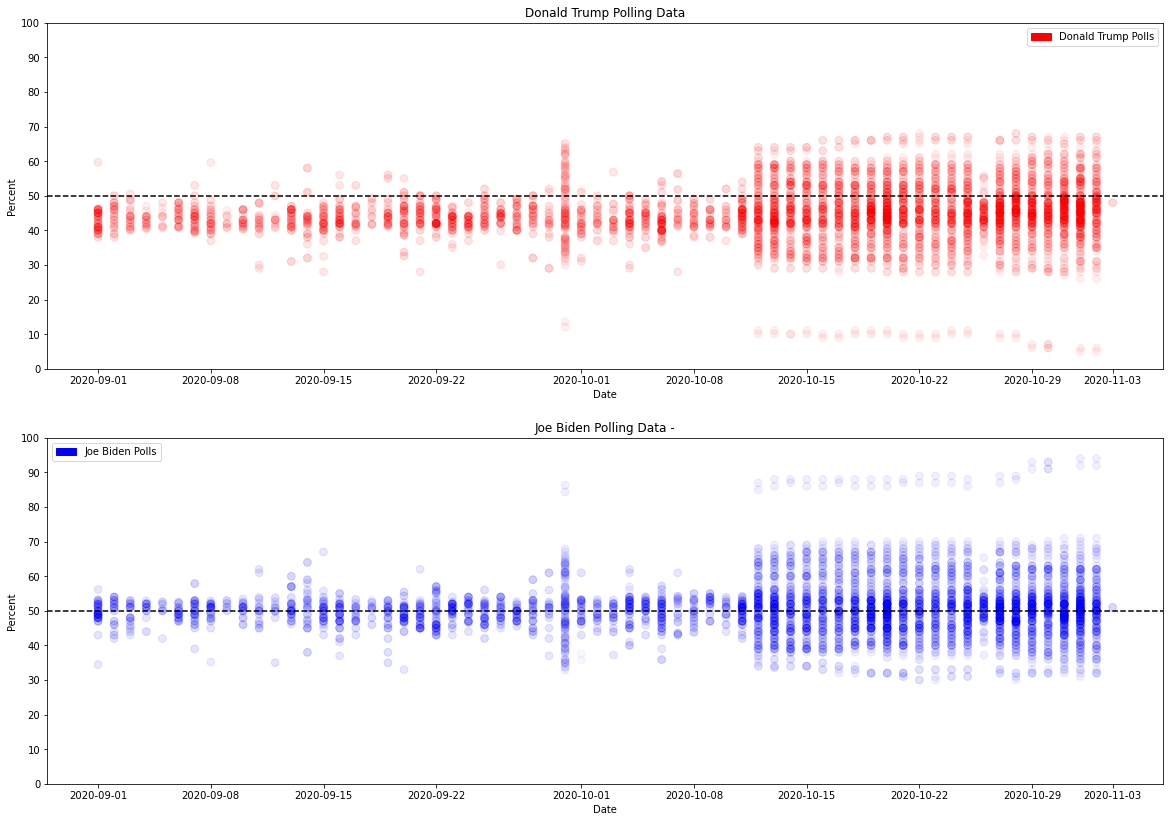

In [20]:
fig,ax=plt.subplots(2,1,figsize=(20,14))

ax[0].scatter(trump_poll,trump_pct,s=60,label="Donald Trump Poll Result",c='red',alpha=trump_alpha)
ax[0].set_xlabel(xlabel_1)
ax[0].set_ylabel(ylabel_1)
ax[0].xaxis.set_ticks(xticks_1)  
ax[0].yaxis.set_ticks(yticks_2) 
ax[0].legend(handles=[DTPoll])
ax[0].set_title("Donald Trump Polling Data")
ax[0].axhline(50, color='black',ls='--')
#############################################################
ax[1].scatter(biden_poll,biden_pct,s=60,label="Joe Biden Poll Result",c='blue',alpha=biden_alpha)
ax[1].set_xlabel(xlabel_1)
ax[1].set_ylabel(ylabel_1)
ax[1].xaxis.set_ticks(xticks_1)  
ax[1].yaxis.set_ticks(yticks_2) 
ax[1].legend(handles=[JBPoll])
ax[1].axhline(50, color='black',ls='--')
ax[1].set_title("Joe Biden Polling Data -")
#############################################################
fig.subplots_adjust()
plt.savefig("Trump_Biden_polling_data_1.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_Biden_polling_data_1.jpg",dpi=400,bbox_inches='tight')

plt.show()

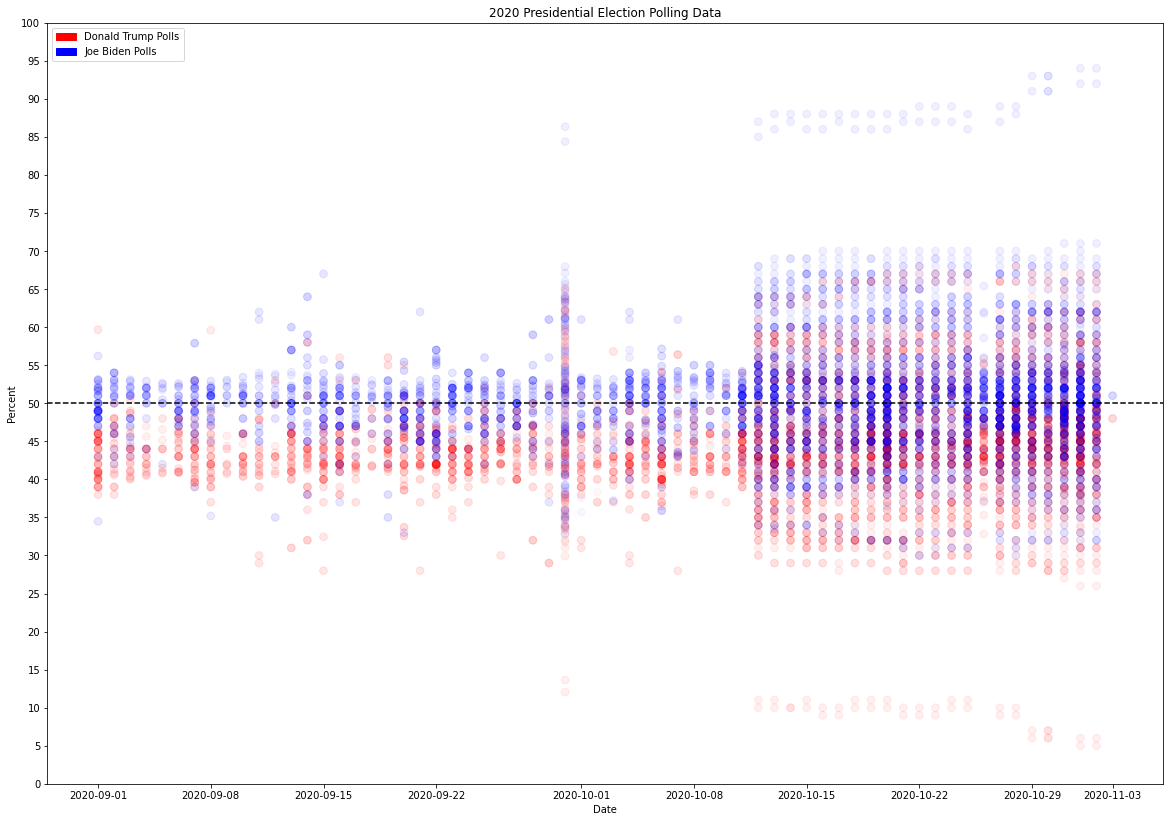

In [21]:
fig,ax=plt.subplots(figsize=(20,14))

ax.scatter(trump_poll,trump_pct,s=60,label="Donald Trump Polls",c='red',alpha=trump_alpha)
ax.scatter(biden_poll,biden_pct,s=60,label="Joe Biden Polls",c='blue',alpha=biden_alpha)
ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_1)
ax.xaxis.set_ticks(xticks_1)  
ax.yaxis.set_ticks(yticks_1) 
ax.legend(handles=[DTPoll, JBPoll],loc="upper left" )
ax.axhline(50, color='black',ls='--', alpha=1)

fig.subplots_adjust()
plt.title('2020 Presidential Election Polling Data')
plt.savefig("Trump_Biden_polling_data_2.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_Biden_polling_data_2.jpg",dpi=400,bbox_inches='tight')


plt.show()

<a id='graph4'></a>
<b> Weighted Polling Averages Compared </b>

These graphs compare the difference between the weighted polling averages that we [calculated previously](#weightedavg). According to the polling data collected between September 1st and November 3rd, Joe Biden's campaign maintained a consistent 5-10% lead over Donald Trump's. At a glance, this seems pretty reasonable given Biden's eventual victory in this campaign.

[List of Graphs](#graphs)
_____________________

In [22]:
xticks_2=["2020-09-01","2020-09-15","2020-10-01","2020-10-15","2020-11-03"]

yticks_3=list(range(40,61,1))
line=ax.axhline(.50, color='black',ls='--')

In [23]:
b_weighted_mean

2020-09-01    49.442606
2020-09-02    49.692432
2020-09-03    48.956818
2020-09-04    50.427391
2020-09-05    49.994167
                ...    
2020-10-30    51.683699
2020-10-31    49.819310
2020-11-01    50.542667
2020-11-02    50.663797
2020-11-03    51.000000
Length: 64, dtype: float64

In [24]:
yticks_3

[40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

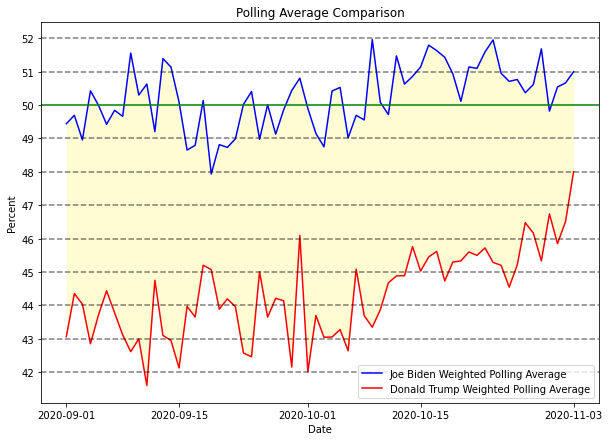

In [25]:
fig, ax=plt.subplots(figsize=(10,7))

ax.plot(b_weighted_mean.index,b_weighted_mean.values,label="Joe Biden Weighted Polling Average",c='blue',alpha=1)
ax.plot(t_weighted_mean.index,t_weighted_mean.values,label="Donald Trump Weighted Polling Average",c='red',alpha=1)
ax.xaxis.set_ticks(xticks_2)  
ax.yaxis.set_ticks(yticks_3)
ax.fill_between(b_weighted_mean.index, b_weighted_mean.values, t_weighted_mean.values, alpha=.3, linewidth=0,color='#FFF36D')
ax.axhline(50, color='green')

temp=list(range(42,53))
temp.remove(50)
for i in temp:
    ax.axhline(i, color='black',ls='--',alpha=.5)

    

ax.legend()
ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_1)
plt.title("Polling Average Comparison")
fig.subplots_adjust()

plt.legend()
plt.savefig("Trump_Biden_weighted_polling_averages_comparison_1.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_Biden_weighted_polling_averages_comparison_1.jpg",dpi=400,bbox_inches='tight')

plt.show()


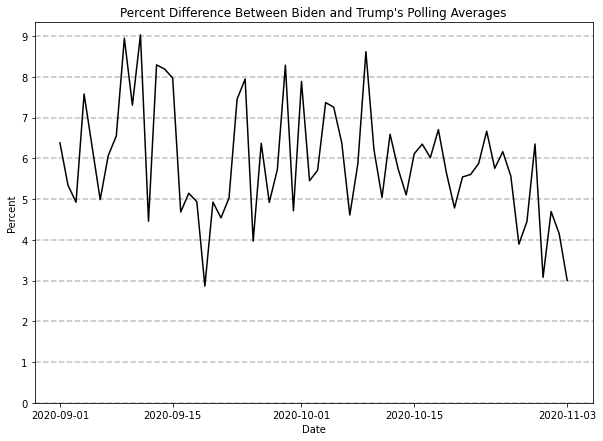

In [26]:
temp_y=list(range(0,10))
fig, ax=plt.subplots(figsize=(10,7))

ax.plot(b_weighted_mean.index,b_weighted_mean.values-t_weighted_mean.values,label="% Difference",c="black")

ax.xaxis.set_ticks(xticks_2)  
ax.yaxis.set_ticks(temp_y)

for i in temp_y:
    ax.axhline(i,color='black',linestyle='--',alpha=.25)

#ax.legend()
ax.set_xlabel(xlabel_1)
ax.set_ylabel("Percent")
plt.title("Percent Difference Between Biden and Trump's Polling Averages")
fig.subplots_adjust()

plt.savefig("Trump_Biden_weighted_polling_averages_comparison_2.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_Biden_weighted_polling_averages_comparison_2.jpg",dpi=400,bbox_inches='tight')


plt.show()

<a id='graph3'></a>
<b> Weighted Mean - Scatter Plots </b>

These combine the polling data scatter plots with the weighted polling averages. The "polling average" line follows the darkest sections of the scatter plots, allowing us to visually confirm its accuracy.

[List of Graphs](#graphs)


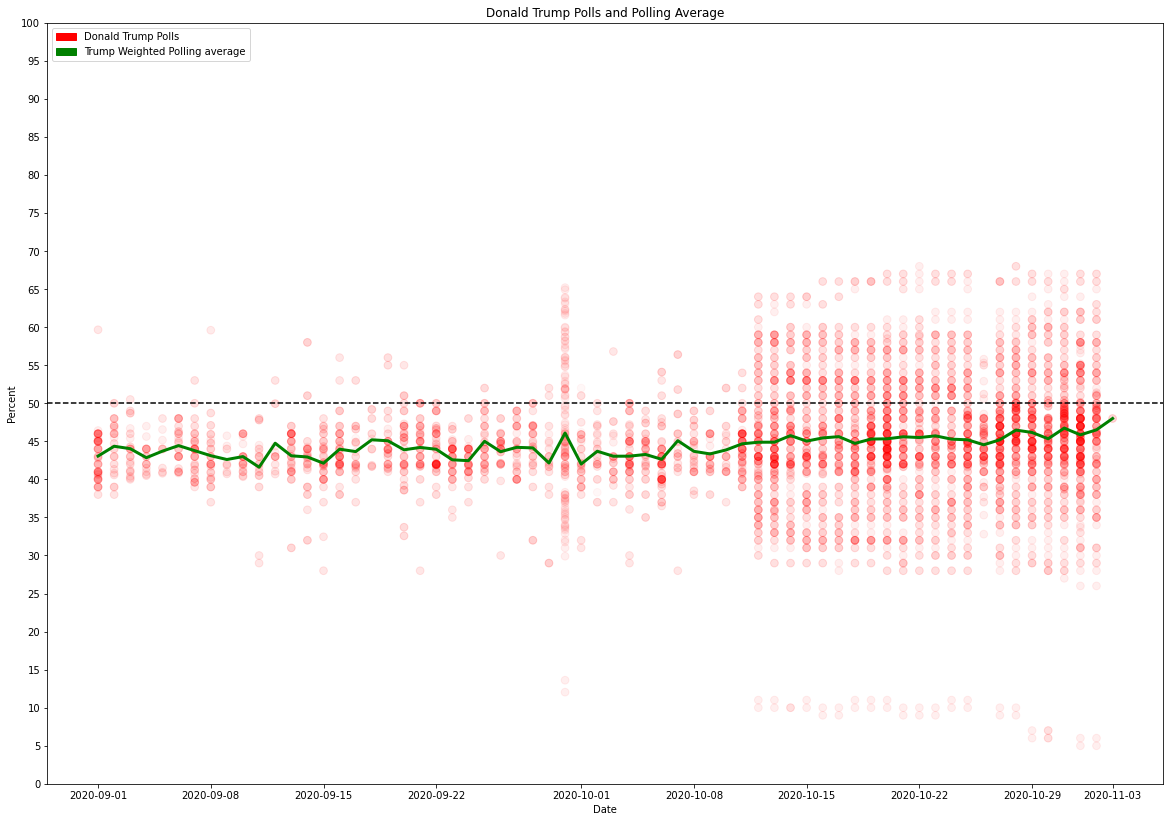

In [27]:
fig,ax=plt.subplots(figsize=(20,14))

ax.scatter(trump_poll,trump_pct,s=60,label="Donald Trump Polls",c='red',alpha=trump_alpha)
ax.plot(t_weighted_mean.index,t_weighted_mean.values,label="Donald Trump Polling Average",c='green',alpha=1,linewidth=3)
ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_1)
ax.xaxis.set_ticks(xticks_1)  
ax.yaxis.set_ticks(yticks_1) 
ax.legend(handles=[DTPoll, DTWPoll],loc="upper left")
ax.axhline(50, color='black',ls='--')

fig.subplots_adjust()
plt.title('Donald Trump Polls and Polling Average')
plt.savefig("Trump_polling_average.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_polling_average.jpg",dpi=400,bbox_inches='tight')

plt.show()

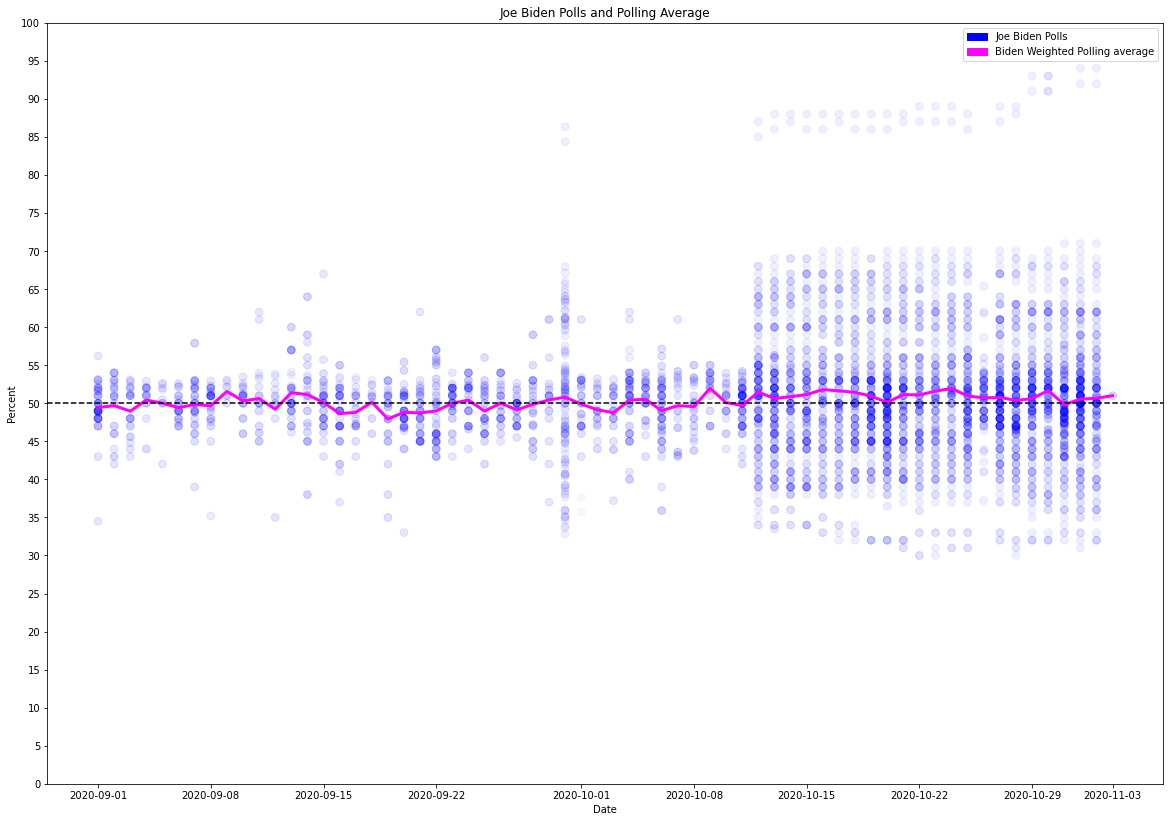

In [28]:
fig,ax=plt.subplots(figsize=(20,14))

ax.scatter(biden_poll,biden_pct,s=60,label="Joe Biden Polls",c='blue',alpha=biden_alpha)
ax.plot(b_weighted_mean.index,b_weighted_mean.values,label="Joe Biden Polling Average",c='magenta',alpha=1,linewidth=3)
ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_1)
ax.xaxis.set_ticks(xticks_1)  
ax.yaxis.set_ticks(yticks_1) 
ax.legend(handles=[JBPoll, JBWPoll])
ax.axhline(50, color='black',ls='--')

fig.subplots_adjust()
plt.title('Joe Biden Polls and Polling Average')
plt.savefig("Biden_weighted_polling_average.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Biden_weighted_polling_average.jpg",dpi=400,bbox_inches='tight')

plt.show()

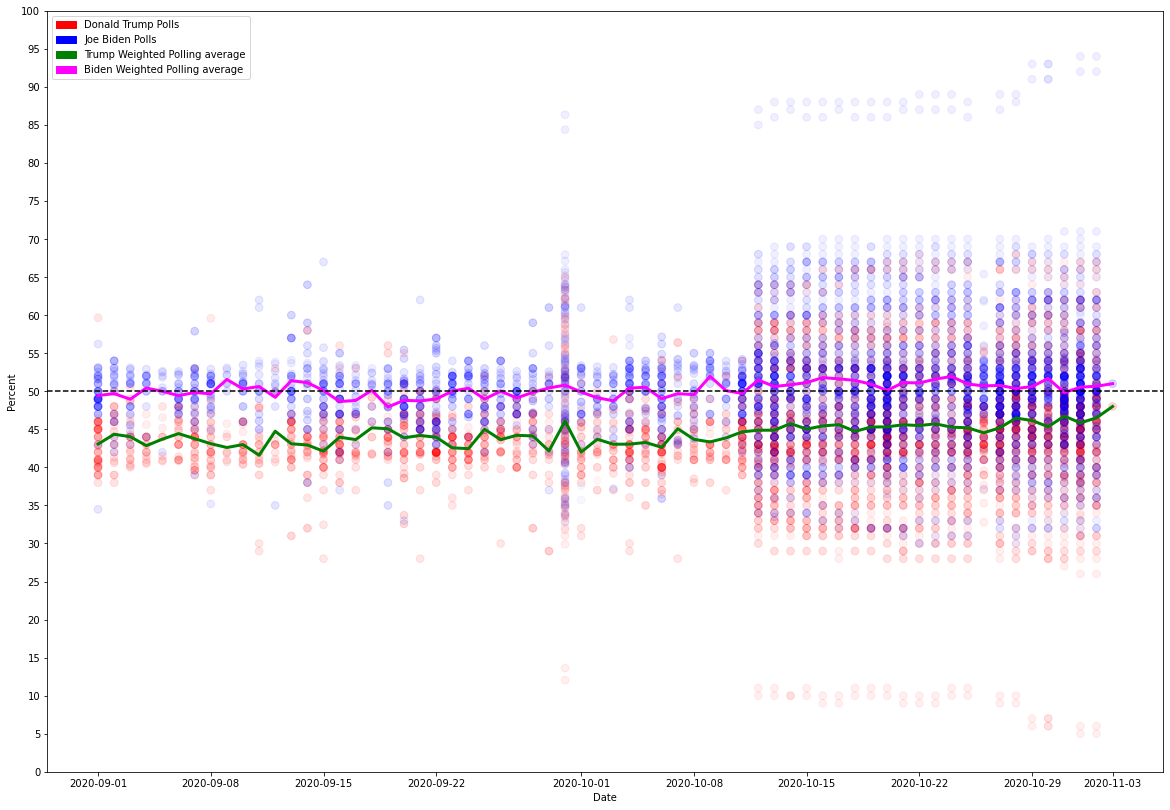

In [29]:
fig,ax=plt.subplots(figsize=(20,14))

ax.scatter(trump_poll,trump_pct,s=60,label="Donald Trump Polls",c='red',alpha=trump_alpha)
ax.scatter(biden_poll,biden_pct,s=60,label="Joe Biden Polls",c='blue',alpha=biden_alpha)
ax.plot(b_weighted_mean.index,b_weighted_mean.values,label="Joe Biden Polling Average",c='magenta',alpha=1,linewidth=3)
ax.plot(t_weighted_mean.index,t_weighted_mean.values,label="Donald Trump Polling Average",c='green',alpha=1,linewidth=3)

ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_1)
ax.xaxis.set_ticks(xticks_1)  
ax.yaxis.set_ticks(yticks_1) 
ax.legend(handles=[DTPoll, JBPoll,DTWPoll,JBWPoll])
ax.axhline(50, color='black',ls='--')

fig.subplots_adjust()
plt.savefig("Trump_Biden_combined_weighted_polling_averages_comparison.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_Biden_combined_weighted_polling_averages_comparison.jpg",dpi=400,bbox_inches='tight')
plt.show()

<a id='graph6'></a>
<b> Percent Change - Polling Average</b>

The following graphs plot day-to-day movement of the candidates' polling averages. This is represented using daily percentage change.

[List of Graphs](#graphs)


In [30]:
yticks_4=list(range(-10,11))
yticks_5=list(range(-6,7))
ylabel_2="Percent Change"

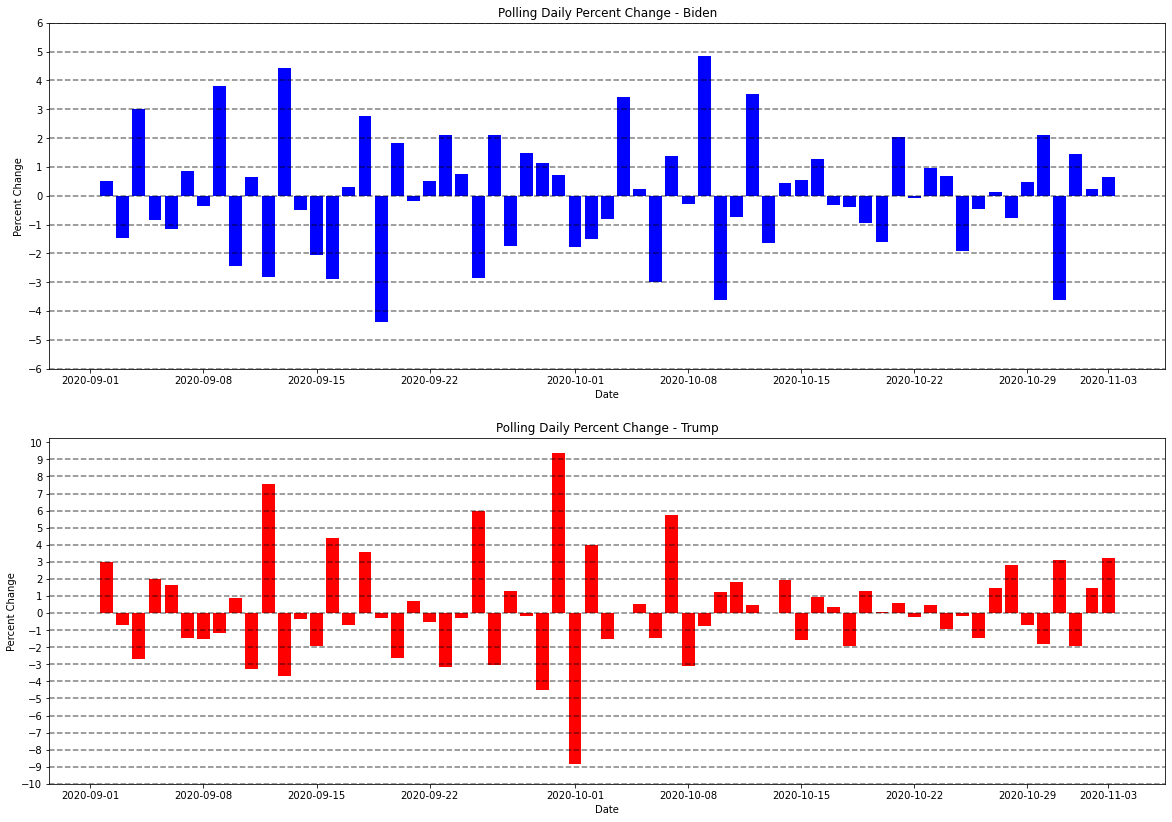

In [31]:
fig, ax=plt.subplots(2,1,figsize=(20,14))


ax[0].bar(b_weighted_mean.index,100*(b_weighted_mean.pct_change().values),label="Biden  Change",color='blue',alpha=1)
ax[0].xaxis.set_ticks(xticks_1)  
ax[0].yaxis.set_ticks(yticks_5)
for i in range(-6,7):
    ax[0].axhline(i,color='black',ls='--',alpha=grid_alpha)


ax[1].bar(t_weighted_mean.index,100*(t_weighted_mean.pct_change().values),label="Trump Polling % Change",color='red',alpha=1)
ax[1].xaxis.set_ticks(xticks_1) 
ax[1].yaxis.set_ticks(yticks_4)


for i in range(-10,10):
    ax[1].axhline(i,color='black',ls='--',alpha=grid_alpha)

ax[0].set_title("Polling Daily Percent Change - Biden")
ax[0].set_xlabel(xlabel_1)
ax[0].set_ylabel(ylabel_2)

ax[1].set_title("Polling Daily Percent Change - Trump")
ax[1].set_xlabel(xlabel_1)
ax[1].set_ylabel(ylabel_2)
fig.subplots_adjust()
plt.savefig("Trump_Biden_polling_averages_percent_change.pdf",dpi=400,bbox_inches='tight')
plt.savefig("Trump_Biden_polling_averages_percent_change.jpg",dpi=400,bbox_inches='tight')

plt.show()

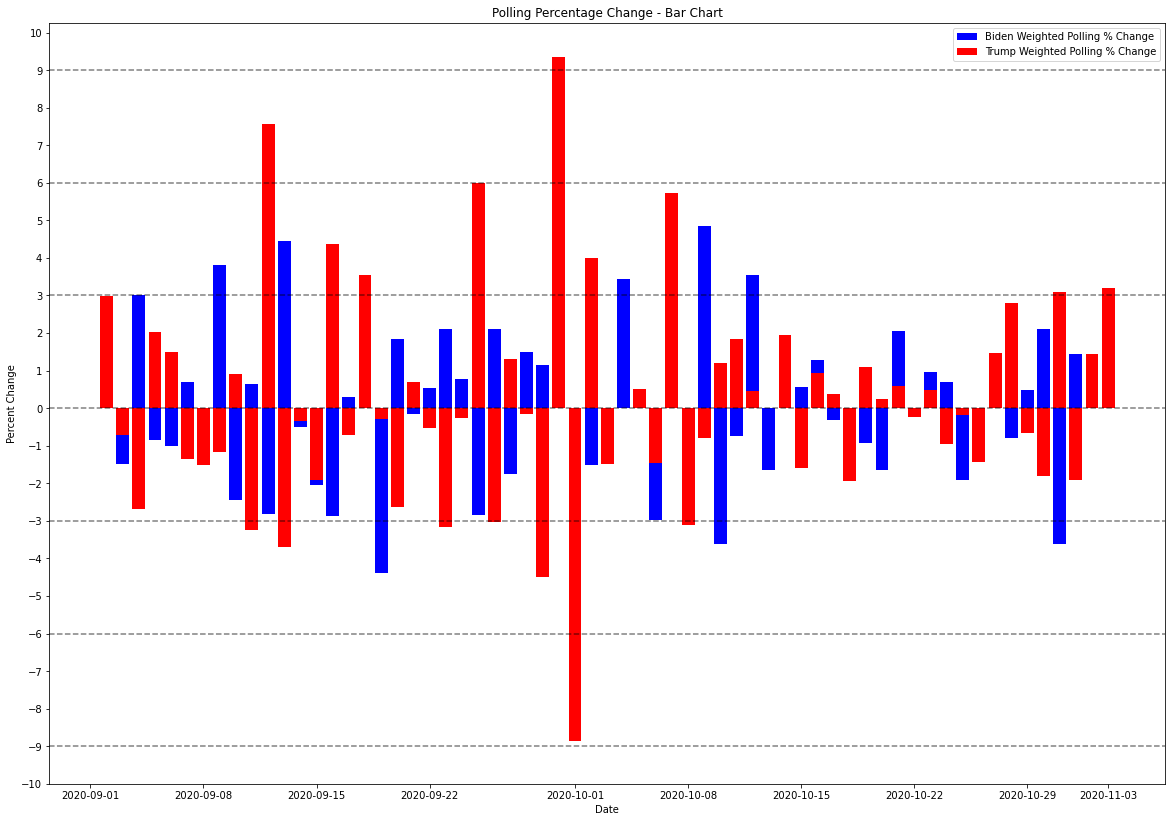

In [33]:
fig, ax=plt.subplots(figsize=(20,14))


ax.bar(b_weighted_mean.index,100*(b_weighted_mean.pct_change().values),label="Biden Weighted Polling % Change",color='blue',alpha=1)
ax.bar(t_weighted_mean.index,100*(t_weighted_mean.pct_change().values),label="Trump Weighted Polling % Change",color='red',alpha=1)

ax.xaxis.set_ticks(xticks_1)  
ax.yaxis.set_ticks(yticks_4)
ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_2)


ax.axhline(-9, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-6, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-3, color='black',ls='--',alpha=grid_alpha)
ax.axhline(0, color='black',ls='--',alpha=grid_alpha)
ax.axhline(3, color='black',ls='--',alpha=grid_alpha)
ax.axhline(6, color='black',ls='--',alpha=grid_alpha)
ax.axhline(9, color='black',ls='--',alpha=grid_alpha)
ax.set_title("Polling Percentage Change - Bar Chart")
ax.legend()
plt.show()

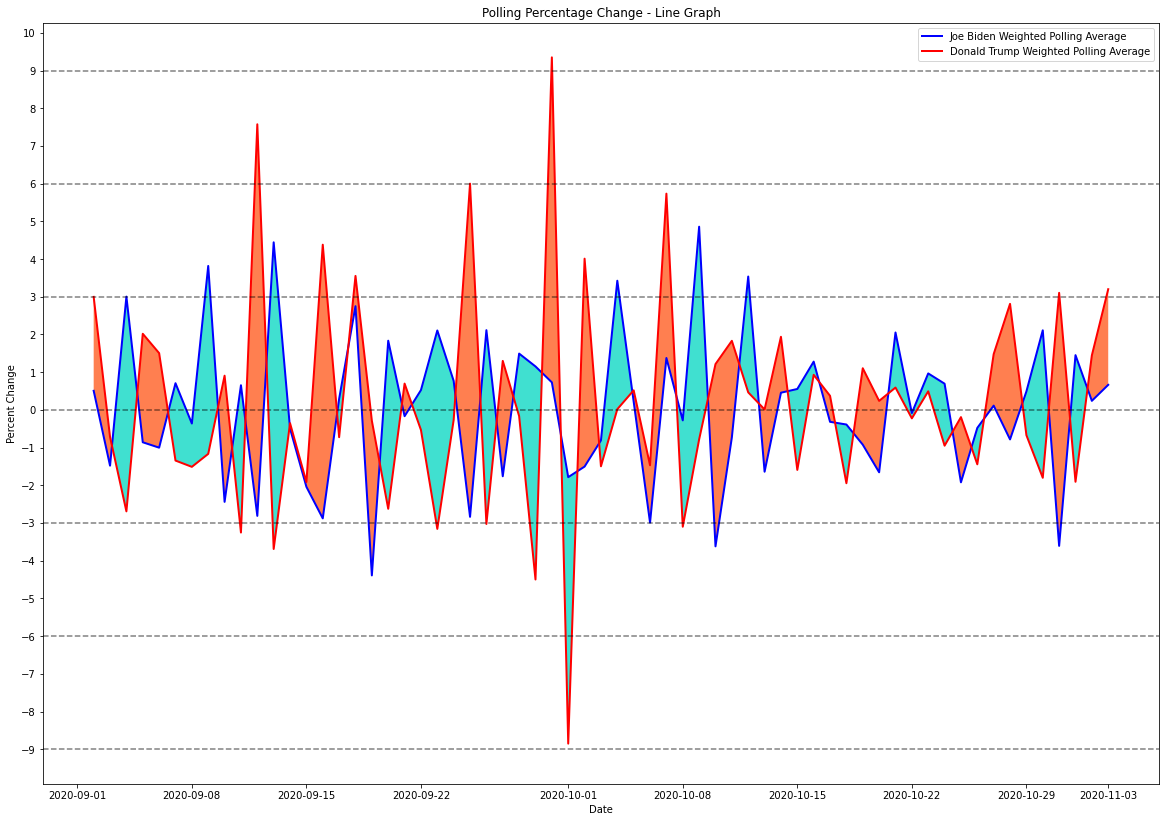

In [34]:
fig, ax=plt.subplots(figsize=(20,14))

ax.plot(b_weighted_mean.index,100*(b_weighted_mean.pct_change().values),
        label="Joe Biden Weighted Polling Average",c='blue',alpha=1,linewidth=2)

ax.plot(t_weighted_mean.index,100*(t_weighted_mean.pct_change().values),
        label="Donald Trump Weighted Polling Average",c='red',alpha=1,linewidth=2)

ax.xaxis.set_ticks(xticks_1)  
ax.yaxis.set_ticks(yticks_4)

ax.axhline(-9, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-6, color='black',ls='--',alpha=grid_alpha)
ax.axhline(-3, color='black',ls='--',alpha=grid_alpha)
ax.axhline(0, color='black',ls='--',alpha=grid_alpha)
ax.axhline(3, color='black',ls='--',alpha=grid_alpha)
ax.axhline(6, color='black',ls='--',alpha=grid_alpha)
ax.axhline(9, color='black',ls='--',alpha=grid_alpha)

plt.fill_between(b_weighted_mean.index, 100*(b_weighted_mean.pct_change().values),
                 100*(t_weighted_mean.pct_change().values),
                 where=(100*(b_weighted_mean.pct_change().values)) <= 100*(t_weighted_mean.pct_change().values),
                 facecolor='coral', interpolate=True)
plt.fill_between(b_weighted_mean.index, 100*(t_weighted_mean.pct_change().values),
                 100*(b_weighted_mean.pct_change().values),
                 where=(100*(t_weighted_mean.pct_change().values)) < 100*(b_weighted_mean.pct_change().values),
                 facecolor='turquoise',interpolate=True,)


ax.legend()
ax.set_xlabel(xlabel_1)
ax.set_ylabel(ylabel_2)
plt.title("Polling Percentage Change - Line Graph")
fig.subplots_adjust()
plt.show()

### Exporting the Dataframes into Files
<a id='export'></a>

We will be exporting the two dataframes we created into .csv files. This will allow us to access the data that we sorted and cleaned, without having to re-run any code.

The following code will create two files: **trump polling data.csv** and **biden polling data.csv**. Do not run the following cell if you do not wish to create new files on your computer.

In [ ]:
trump.to_csv('trump polling data.csv')
biden.to_csv('biden polling data.csv')

<a href="#contents">


<div class="alert alert-block alert-info"> 
<b>Click this box to return to the table of contents
</b>    
    
</div>
    </a>

<a href="./Final_Project_3.ipynb">


<div class="alert alert-block alert-success"> 
<b>Click this box to continue on to the Sentiment Analysis of Twitter data
</b>    
    
</div>

</a>

<a href="./Final_Project_1.ipynb">


<div class="alert alert-block alert-danger"> 
<b>Click this box to return to the 2020 background info
</b>    
    
</div>

</a>